<a href="https://colab.research.google.com/github/MengOonLee/BertelsmannAITrack/blob/Lesson05/ClassifyingFashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms

In [0]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.FashionMNIST("~/.pytorch/FashionMNIST_data/", download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [0]:
# Build a network architecture
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 10)

  def forward(self, x):
    # input tensor is flattened
    x = x.view(x.shape[0], -1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.log_softmax(self.fc4(x), dim=1)
    return x

In [0]:
# Define the criterion and optimizer
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [5]:
# Train the network
epochs = 5
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    logps = model(images)
    loss = criterion(logps, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  else:
    print(f"Training loss: {running_loss}")

Training loss: 483.84944801032543
Training loss: 364.6528303697705
Training loss: 331.67646806687117
Training loss: 310.3083375841379
Training loss: 293.76870891451836


--2019-12-23 00:20:19--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



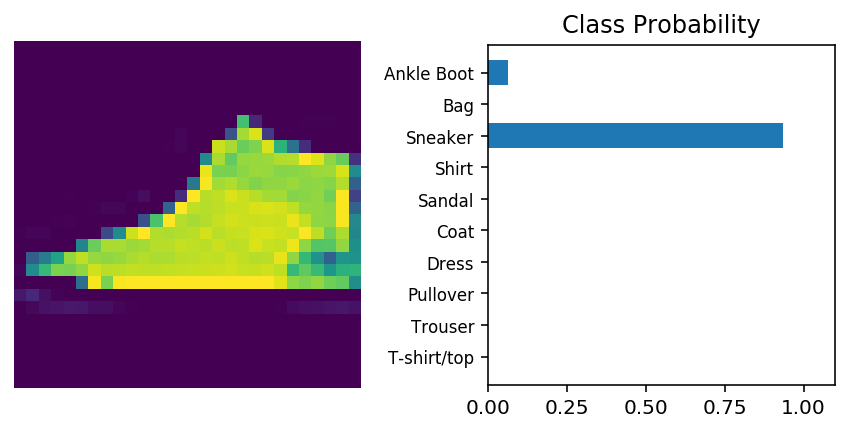

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"

!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
import helper

dataiter = iter(trainloader)
images, labels = dataiter.next()
img = images[1]

# Calculate the class probabilities for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img, ps, version="Fashion")